In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "/Users/elshaddhai/personalproject/machine_learning/fast_ai/fastai/old")

In [3]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

from sklearn import metrics

In [4]:
PATH = "./data/housing_price"

In [5]:
!ls {PATH}

train.csv


In [6]:
!head data/housing_price/Train.csv

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PCo

In [7]:
df_raw = pd.read_csv(f'{PATH}/train.csv', low_memory=False)

In [8]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000):
        with pd.option_context("display.max_columns", 1000):
            display(df)

In [9]:
display_all(df_raw.tail().transpose())

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [10]:
df_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [12]:
train_cats(df_raw)

In [13]:
df_raw.HouseStyle.cat.categories

Index(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer',
       'SLvl'],
      dtype='object')

In [14]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [15]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/housing-raw')

In [16]:
!ls

Applying Random forest. Kaggle Housing.ipynb
Random forest Feature importance.ipynb
Started With Random Forest.ipynb
data
old_fast_ai
tmp


In [17]:
!ls tmp/

bulldozers-raw housing-raw


In [18]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [43]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9733285140615788

In [44]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 400  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1060, 83), (1060,), (400, 83))

In [45]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [46]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 246 ms, sys: 5.66 ms, total: 252 ms
Wall time: 121 ms
[0.06769273408779898, 0.1464776355533614, 0.9723053816012992, 0.8502853859472017]


In [47]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [48]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,4,4,4,4,4
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,2,2,2,2,2
Alley,0,0,0,0,0
LotShape,4,4,1,1,1
LandContour,4,4,4,4,4
Utilities,1,1,1,1,1


In [49]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(df, y)
print_score(m)

[0.07694156967976998, 0.07679348117155957, 0.9642205748547017, 0.9588499598039965, 0.8708614428996043]


In [26]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09922035247496931, 0.14426037424744848, 0.9405005699625373, 0.8547836013097373, 0.8626798933418373]


In [27]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07876795856282533, 0.14057161796298637, 0.9625017971228625, 0.862115058163583, 0.8660276740240668]


In [28]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.10916183938223485, 0.15398194182027028, 0.9279800253156043, 0.8345521463874331, 0.8405644722899281]


In [29]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09796831671650497, 0.14078976074706614, 0.9419927113038126, 0.8616867790568659, 0.8602243358995695]


In [30]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, max_features=1, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.23530397972201506, 0.23035048977974104, 0.6653661889454109, 0.6297459368212897, 0.6130931227172247]


In [31]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08139361876550816, 0.13772844407622592, 0.9599601916714893, 0.8676363191698843, 0.8558816104560237]


In [32]:
m = RandomForestRegressor(n_estimators=60, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09928358317833354, 0.1415727356017691, 0.9404247107362144, 0.8601440971681973, 0.8616159714193583]


In [33]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08067673460673927, 0.14393021788933882, 0.9606623965417683, 0.8554475293604236, 0.8609591191160457]


In [34]:
m = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07824309366072567, 0.13728100395001425, 0.962999865571177, 0.8684949452908924, 0.8706017545616155]


In [50]:
m = RandomForestRegressor(n_estimators=600, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07862248816758143, 0.1386508071800341, 0.9626401742345286, 0.8658575118366476, 0.8729336708986521]


In [36]:
m = RandomForestRegressor(n_estimators=1000, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07764589465271426, 0.13762803920166303, 0.9635625252458081, 0.8678292366841871, 0.8745692255993636]


In [37]:
m = RandomForestRegressor(n_estimators=1000, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07827367449464127, 0.1381699110207105, 0.962970937367247, 0.8667864171623731, 0.8740557013789585]


In [38]:
m = RandomForestRegressor(n_estimators=1000, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07833848082883892, 0.13785688147369116, 0.962909595894747, 0.8673893349887424, 0.8737212025651728]


In [39]:
X_train = df
Y_train = y

In [40]:
m = RandomForestRegressor(n_estimators=1000, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

ValueError: Number of labels=1060 does not match number of samples=1460

In [51]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [52]:
df.shape

(1460, 83)

In [53]:
y.shape

(1460,)

In [54]:
nas

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1980.0}

In [56]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [57]:
set_rf_samples(800)

In [58]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 208 ms, sys: 5.76 ms, total: 213 ms
Wall time: 131 ms
[0.07905350191538621, 0.15368288640802094, 0.9622294333216217, 0.8351941701034586, -0.8063226525375986]


In [59]:
reset_rf_samples()

In [61]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [62]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.05642865110634264, 0.14324683648544598, 0.9807553236283455, 0.8568169423604759, 0.857162597792875]


In [ ]:
t=m.estimators_[0].tree_

In [ ]:
dectree_max_depth(t)

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=1000, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=2000, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=5000, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=5000, min_samples_leaf=3, max_features='log2', n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [63]:
m = RandomForestRegressor(n_estimators=5000, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07827374538123871, 0.1380679547428966, 0.962970870298326, 0.8669829425833002, 0.874073643134729]


In [64]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 19.8 s, sys: 218 ms, total: 20 s
Wall time: 20.8 s


(12.23627350982614, 0.14395421003276618)

In [65]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 4.35 s, sys: 849 ms, total: 5.2 s
Wall time: 14.8 s


(12.23627350982614, 0.14395421003276618)

In [66]:
raw_train, raw_valid = split_vals(df_raw, n_trn)

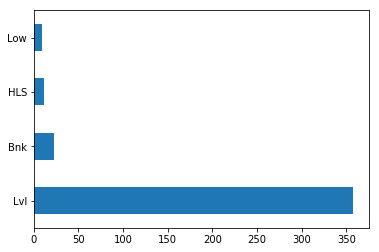

In [67]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.LandContour.value_counts().plot.barh();

In [68]:
flds = ['LandContour', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('LandContour', as_index=False).mean()
enc_summ

,LandContour,SalePrice,pred,pred_std
0,Bnk,11.774813,11.856389,0.215802
1,HLS,12.431601,12.341647,0.173358
2,Low,12.094281,12.072488,0.199113
3,Lvl,12.011417,12.008605,0.151128


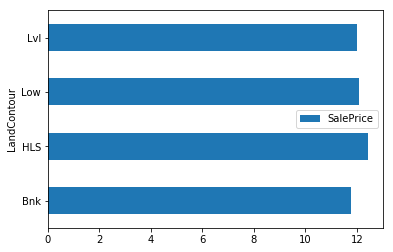

In [75]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('LandContour', 'SalePrice', 'barh', xlim=(0,13));

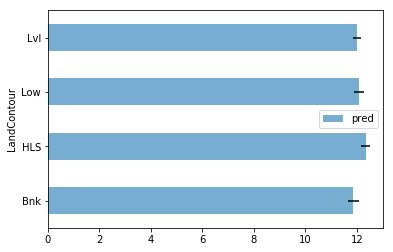

In [76]:
enc_summ.plot('LandContour', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,13));

In [77]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
17,OverallQual,0.341511
46,GrLivArea,0.157767
19,YearBuilt,0.095142
38,TotalBsmtSF,0.045171
61,GarageCars,0.043217
62,GarageArea,0.032883
43,1stFlrSF,0.032825
27,ExterQual,0.028083
49,FullBath,0.019313
34,BsmtFinSF1,0.018498


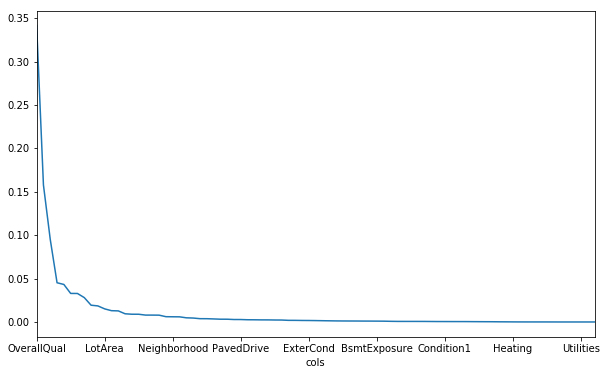

In [78]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [79]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

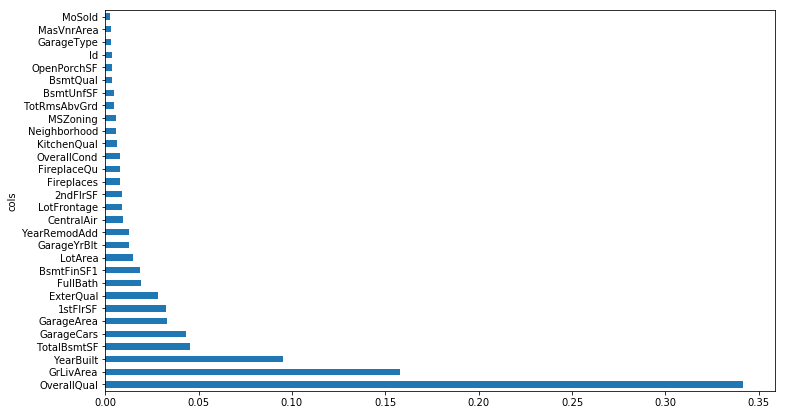

In [80]:
plot_fi(fi[:30]);

In [81]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

22

In [83]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [84]:
m = RandomForestRegressor(n_estimators=5000, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08261858445922803, 0.1365751609552279, 0.9587459325817624, 0.8698437596603754, 0.8764380490778841]
